<a href="https://colab.research.google.com/github/88kHw88/Winc.Assignment.Shark_attack/blob/main/Assignment_Shark_Attack_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%load_ext google.colab.data_table

In [ ]:
#Obtaining data
#Getting error message: 'utf-8' codec can't decode byte 0xf3 in position 7: invalid continuation byte
#Solved error with:  'encoding = 'latin-1'
#https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte

#https://stackoverflow.com/questions/43332057/pandas-strip-white-space
#apply 'skipinitialspace=True' to remove whitespaces
df = pd.read_csv("https://raw.githubusercontent.com/88kHw88/Winc.Assignment.Shark_attack/main/shark_attacks.csv", sep=',' , encoding='latin-1', skipinitialspace=True) 
df


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Show columns
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
#Remove irrelevant columns
df2 = df.drop(columns=['Case Number', 'Date', 'Year', 'Country', 'Area', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23', 'Time', 'Injury', 'Name', 'Sex ', 'Location'])

#Renaming columns
df2 = df2.rename(columns={'Fatal (Y/N)':'Fatal', 'Species ': 'Species'})
df2


,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,N,White shark
1,Unprovoked,Standing,11,N,NaN
2,Invalid,Surfing,48,N,NaN
3,Unprovoked,Surfing,NaN,N,2 m shark
4,Provoked,Free diving,NaN,N,"Tiger shark, 3m"
...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN


In [ ]:
###Analysis on the dataset and data values###
#different strategies to find (non-default) missing values

#function to find unique values in a column
def unique(column):
    print(f'Unique values in this column are:\n {column.unique()}\n')


#function to sort unique values in alphabetical order
#an error is raised when sorting isn't possible
def edges(column):
    try:
      print(f'Sorting unique values in this column:\n {column.sort_values().unique()}\n')
    except ValueError as error:
      print(f"Couldn't sort order because of: {error}\n")


#function to cast all values into this type
#an error is raised when a value cannot be cast into this type of value
def casting(column, dtype): 
    try:
      column.astype(dtype)
      print(f"Casting values into '{dtype}' is successful\n")
    except ValueError as error:
      print(f"Couldn't cast values into '{dtype}': {error}\n")


#function to count the amount of unique values
def count_missing_values(column):
    print('Counting values in this column:')
    display(column.value_counts())
    print('*' * 160)


#function to find (non-default) missing values
#four strategies are applied when searching for missing values
def find_non_default_values(column_name, dtype):
  column = df2[column_name]

  print(f'Missing value analysis on column: {column_name}\n')
  unique(column)
  edges(column)
  casting(column, dtype)
  count_missing_values(column)


In [ ]:
#Apply functions to find non_default_values:
find_non_default_values('Type', 'str')
find_non_default_values('Activity', 'str')
find_non_default_values('Age', 'float')
find_non_default_values('Fatal', 'str')
find_non_default_values('Species', 'str')


Missing value analysis on column: Type

Unique values in this column are:
 ['Boating' 'Unprovoked' 'Invalid' 'Provoked' 'Questionable' 'Sea Disaster'
 nan 'Boat' 'Boatomg']

Sorting unique values in this column:
 ['Boat' 'Boating' 'Boatomg' 'Invalid' 'Provoked' 'Questionable'
 'Sea Disaster' 'Unprovoked' nan]

Casting values into 'str' is successful

Counting values in this column:


Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

****************************************************************************************************************************************************************
Missing value analysis on column: Activity

Unique values in this column are:
 ['Paddling' 'Standing' 'Surfing' ...
 'Crew swimming alongside their anchored ship' '4 men were bathing'
 'Wreck of  large double sailing canoe']

Sorting unique values in this column:
 ['"Boat accident"'
 '"Climbing up to ship after repairing the stern in water"'
 '"Crossing the river"' ... 'yachting accident' 'yachtsman in a zodiac'
 nan]

Casting values into 'str' is successful

Counting values in this column:


Surfing                                                      971
Swimming                                                     869
Fishing                                                      431
Spearfishing                                                 333
Bathing                                                      162
                                                            ... 
C47 aircraft carrying 5,000 lbs of ice ditched in the sea      1
Spear fishing                                                  1
Spearfishing with Scuba gear                                   1
Fishing from shore, washed into the sea                        1
Fishing boat swamped in a storm                                1
Name: Activity, Length: 1530, dtype: int64

****************************************************************************************************************************************************************
Missing value analysis on column: Age

Unique values in this column are:
 ['57' '11' '48' nan '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40s' '28' '20' '24' '26' '49' '22' '7' '31' '17' '40' '13' '42' '3' '8'
 '50' '16' '82' '73' '20s' '68' '51' '39' '58' 'Teen' '47' '61' '65' '36'
 '66' '43' '60s' '9' '72' '59' '6' '27' '64' '23' '71' '44' '62' '63' '70'
 '18 months' '53' '30s' '50s' 'teen' '77' '74' '28 & 26' '5' '86'
 '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26' '8 or 10'
 '84' '\xa0 ' '30 or 36' '6½' '21 & ?' '75' '33 or 37' 'mid-30s' '23 & 20'
 '7      &    31' '20?' "60's" '32 & 30' '16 to 18' '87' '67' 'Elderly'
 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50' '18 to 22' 'adult'
 '9 & 12' '? & 19' '9 months' '25 

17             154
18             150
19             142
20             141
15             139
              ... 
72               1
21 & ?           1
9 & 12           1
?    &   14      1
mid-30s          1
Name: Age, Length: 152, dtype: int64

****************************************************************************************************************************************************************
Missing value analysis on column: Fatal

Unique values in this column are:
 ['N' 'Y' nan 'M' 'UNKNOWN' '2017' 'N ' 'y']

Sorting unique values in this column:
 ['2017' 'M' 'N' 'N ' 'UNKNOWN' 'Y' 'y' nan]

Casting values into 'str' is successful

Counting values in this column:


N          4300
Y          1388
UNKNOWN      71
M             1
2017          1
N             1
y             1
Name: Fatal, dtype: int64

****************************************************************************************************************************************************************
Missing value analysis on column: Species

Unique values in this column are:
 ['White shark' nan '2 m shark' ... "12' tiger shark" 'Blue pointers'
 'Said to involve a grey nurse shark that leapt out of the water and  seized the boy but species identification is questionable']

Sorting unique values in this column:
 [' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']'
 " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] "
 ' Bull shark, 1.2m ' ... '\x93small brown shark\x94' '\xa0 ' nan]

Casting values into 'str' is successful

Counting values in this column:


White shark                                           164
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
                                                     ... 
.5 m shark                                              1
White shark, 2.1 m [7']                                 1
Reported to involve a 4 m white shark                   1
2' to 3' juvenile shark                                 1
3 m to 4 m white shark                                  1
Name: Species, Length: 1544, dtype: int64

****************************************************************************************************************************************************************


In [ ]:
###Cleaning data values###
#using different strategies replace non default missing values to default missing values
#dropping rows with no data values available

###DROPPING###
#drop rows where all data values are missing from the dataset  
df2 = df2.dropna(how='all')

#Removed whitespaces in dataset by applying 'skipinitialspace=True' while importing data
#https://stackoverflow.com/questions/43332057/pandas-strip-white-space


###REPLACING###
#function to replace non-default missing values with default missing values
def replace(column_name, old_value, new_value):
  column = df2[column_name]
  df2[column_name] = column.replace({old_value:new_value})


#Replacing values in column 'Type'
#Replacing typo 'Boatomg' and 'Boat' to 'Boating
#NaN is replaced by None 
replace('Type', 'Boatomg', 'Boating') #--> 'Boatomg' is replaced by 'Boating'
replace('Type', 'Boat', 'Boating')    #--> 'Boat' is replaced by 'Boating'
replace('Type', np.nan, None)    #--> 'NaN' is replaced by None



#Replacing values in column 'Activity'
#NaN is replaced by None 
replace('Activity', '.', None)  # --> . replaced by None
replace('Activity', np.nan, None)



#Replacing values in column 'Age'
#https://stackoverflow.com/questions/43332057/pandas-strip-white-space


#Replacing values in column 'Species'
#Dealing with different values with/without additional information/spelling
#https://realpython.com/python-data-cleaning-numpy-pandas/#dropping-columns-in-a-dataframe
replace('Species', np.nan, None)
replace('Species', ' ', None)


#Replacing values in column 'Fatal'
#Dealing with different values
#Most of them are typos. Using a Boolean value to replace old values
#The empty values in this column were already set to 'False'. 
#https://pythonexamples.org/pandas-dataframe-replace-multiple-values/
df3 = df2.replace({'Fatal': {
    'N': False,
    'Y':True,
    'M': False,
    'UNKNOWN': False,
    '2017': False,
    ' N': False,
    'N ': False,
    'y': True,
    np.nan: False,
    " ": False}})


#Show new dataset with adjusted default values
#Using this dataset to answer the questions
df3




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,False,White shark
1,Unprovoked,Standing,11,False,None
2,Invalid,Surfing,48,False,None
3,Unprovoked,Surfing,NaN,False,2 m shark
4,Provoked,Free diving,NaN,False,"Tiger shark, 3m"
...,...,...,...,...,...
6297,Unprovoked,Diving,NaN,True,None
6298,Unprovoked,Pearl diving,NaN,True,None
6299,Unprovoked,Swimming,NaN,True,None
6300,Unprovoked,None,NaN,True,None


**QUESTION 1**

**what are the most dangerous type of sharks to humans?**

We start the dataset with 6302 entries. 
To answer this question we select the column 'Fatal' and 'Species'.

For the 'Species' column, we first drop cells with empty values. We want confirmed witness reports of shark attacks. 
We don't apply imputations because it may lead to overpresentation of the most common variable. This may disturb our results. 

The dataset consist of 3458 entries after removing the empty values from the column 'Species'.
Because we deal with multiple descriptions, we try to group several variables that are somewhat similar. We select the top 10 most common variables to determine if we can group some variables together.

Then we filter in column 'Fatal' for those with fatal casualties (Fatal = True). Here we determine which species are dangerous to humans. 

After clearing, transforming and replacing some data values we filter the data in column 'Species' to determine which species are dangerous to humans. The dataset gives 426 entries.
The plot bar shows the top 5 shark species. White sharks are dangerous to humans, followed by the tiger shark and the bull shark








In [ ]:
#What are the most dangerous type of sharks
df_q1 = df3.copy()
"""We first drop cells with empty values in the column 'Species'. We want confirmed shark attacks by witness reports. 
Applying imputations in these empty cells may lead to overpresentation of the most common variable because these are of categorical data. This may disturb our results. 
The dataset consist of 3458 entries after removing the empty values from the column 'Species'. 
"""
#drop empty cells in column 'Species'
df_q1.dropna(subset=['Species'], inplace=True)

#make values in lowercase for column 'Species'
#make it easier to find variables and group them up. 
df_q1['Species'] = df_q1['Species'].str.lower()
df_q1 #data with confirmed shark attacks by witnesses



,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,False,white shark
3,Unprovoked,Surfing,NaN,False,2 m shark
4,Provoked,Free diving,NaN,False,"tiger shark, 3m"
6,Unprovoked,Swimming,18,True,tiger shark
7,Unprovoked,Fishing,52,False,"lemon shark, 3'"
...,...,...,...,...,...
6276,Unprovoked,Standing,16,True,12' tiger shark
6293,Unprovoked,Fishing,NaN,True,blue pointer
6294,Unprovoked,Fishing,NaN,True,blue pointer
6295,Unprovoked,Fishing,NaN,True,blue pointers


In [ ]:
#Copying data 
df2_q1 = df_q1.copy()

"""We select the top 10 most common variables to determine if we can group some variables together."""
#Because we deal with multiple descriptions, we try to group several variables that are somewhat similar. 
df2_q1['Species'].value_counts().head(10) #Select top 10 variables in column 'Species'


white shark                                           165
shark involvement prior to death was not confirmed    105
invalid                                               102
shark involvement not confirmed                        89
tiger shark                                            73
shark involvement prior to death unconfirmed           68
bull shark                                             55
4' shark                                               40
6' shark                                               40
questionable incident                                  38
Name: Species, dtype: int64

In [ ]:
"""Because we deal with multiple descriptions, we try to group several variables that are somewhat similar. 
The species that are in the top 10 are white sharks, tiger sharks and bull sharks.
"""

#We try to group similar variables together into a new variable
#these are 'white sharks', 'tiger sharks', 'bull sharks', 'no shark involvement' and 'invalid. 
#https://realpython.com/python-data-cleaning-numpy-pandas/#combining-str-methods-with-numpy-to-clean-columns
shark_not_involved = df2_q1['Species'].str.contains('involvement')
white_shark = df2_q1['Species'].str.contains('white')
tiger_shark = df2_q1['Species'].str.contains('tiger')
bull_shark = df2_q1['Species'].str.contains('bull')
invalid = df2_q1['Species'].str.contains('invalid')


#applying np.where to group similar variables into 1 group, otherwise keep the current data value. 
#https://realpython.com/python-data-cleaning-numpy-pandas/#combining-str-methods-with-numpy-to-clean-columns
#https://realpython.com/python-data-cleaning-numpy-pandas/#cleaning-the-entire-dataset-using-the-applymap-function
#https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas 
df2_q1['Species'] = np.where(shark_not_involved, 'no shark involvement', 
                          np.where(white_shark, 'white shark',
                                   np.where(tiger_shark, 'tiger shark', 
                                            np.where(bull_shark, 'bull shark', 
                                                     np.where(invalid, None, df2_q1['Species'])))))

#Dataset where similar variables are grouped together
df2_q1

,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57,False,white shark
3,Unprovoked,Surfing,NaN,False,2 m shark
4,Provoked,Free diving,NaN,False,tiger shark
6,Unprovoked,Swimming,18,True,tiger shark
7,Unprovoked,Fishing,52,False,"lemon shark, 3'"
...,...,...,...,...,...
6276,Unprovoked,Standing,16,True,tiger shark
6293,Unprovoked,Fishing,NaN,True,blue pointer
6294,Unprovoked,Fishing,NaN,True,blue pointer
6295,Unprovoked,Fishing,NaN,True,blue pointers


In [ ]:
""" Then we filter in column 'Fatal' for those with fatal casualties. 
Here we determine which species are dangerous to humans.
The empty values in this column were already set to 'False' when we imported the data. 
"""
#copying data
df3_q1 = df2_q1.copy()

#Shark attacks that are fatal
#Fatal = true
#Filter out non-fatal casualties
#Data gives 426 entries of fatal casualties
is_fatal = df3_q1.loc[df3_q1.Fatal == True]
is_fatal


,Type,Activity,Age,Fatal,Species
6,Unprovoked,Swimming,18,True,tiger shark
58,Unprovoked,Scuba diving,49,True,tiger shark
59,Sea Disaster,2 boats capsized,NaN,True,some drowned but other may have been killed by...
64,Unprovoked,Night bathing,22,True,tiger shark
155,Unprovoked,Surfing,17,True,white shark
...,...,...,...,...,...
6276,Unprovoked,Standing,16,True,tiger shark
6293,Unprovoked,Fishing,NaN,True,blue pointer
6294,Unprovoked,Fishing,NaN,True,blue pointer
6295,Unprovoked,Fishing,NaN,True,blue pointers


Text(0.5, 1.0, 'Shark attacks with fatal casualties')

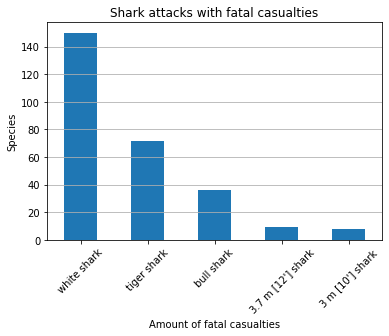

In [ ]:
""" Finally we plot a horizontal bar chart to order the species that are dangerous to humans.
The graph shows that white sharks are dangerous to humans, followed by the tiger shark and the bull shark
"""


#Plotting horizontal barchart with 'value_counts'-method.
#https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html
#https://stackoverflow.com/questions/38662667/matplotlib-and-subplots-properties
#https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner

is_fatal['Species'].value_counts().head(5).plot(kind='bar')

plt.xlabel('Amount of fatal casualties')
plt.ylabel('Species')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.title('Shark attacks with fatal casualties')

In [ ]:
#Top 5 shark species that are involved in shark attacks and their counts:
is_fatal['Species'].value_counts().head(5)

white shark          150
tiger shark           72
bull shark            36
3.7 m [12'] shark      9
3 m [10'] shark        8
Name: Species, dtype: int64

**QUESTION 2**

**Are children more likely to be attacked by sharks?**

First we need to define 'children. According to Unicef a child is under 18 years old (source: https://www.unicef.org/child-rights-convention/convention-text-childrens-version). Then the column 'Age' is divided in two variables, namely 'child' and 'adults'.

We start with the dataset from the previous question (df_q1), where we determine shark attacks that are observed by witnesses. We exclude all observations that are have empty data values

The analysis starts with 3458 entries.

We stated in our previous analysis on non-default missing values that we have different kind of values in column 'Age'. We have to trim these values first. 
´String values´ are converted to ´nan values´. This method can cause a bias, because some cells have multiple ages (like 12yr & 15yr) in it. 

Then we remove all ´nan´ values from the column ´Age´. We could impute this column, but we determined to use categorical variables ('Child' and 'Adults') to answer this question.

After removing the 'nan values' the dataset consists of 1949 entries, with confirmed age and attacks from sharks.

The age in this column are then divided under 18 years (child') and over 18 years (adult). We create a new column 'Age group' which consists of boolean values. Then we replace the boolean values in the column 'Age group' with 'child' and 'adult'. 

By plotting the results it shows that children aren't more likely to be attacked by sharks. 444 childrens were attacked by sharks, whereas 1505 were adults

In [ ]:
"""
In this dataset we have grouped most of the similar variables into one group. 
We then replace values which has 'no shark involvement' with 'None'. 
"""
#Copy our dataset from the first question df2_q1 (dataset where we grouped similar variables into a variable)
#This dataset consists of 3458 entries
df_q2 = df2_q1.copy()
df_q2['Species'] = df_q2['Species'].replace({'no shark involvement': None})


#check str or int values in column 'Age'.
#If 'str' then it becomes NaN. Otherwise it is a numeric value (float)
#https://stackoverflow.com/questions/24037507/converting-string-objects-to-int-float-using-pandas 

df_q2['Age'] = pd.to_numeric(df_q2['Age'], errors='coerce')
df_q2



,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57.0,False,white shark
3,Unprovoked,Surfing,NaN,False,2 m shark
4,Provoked,Free diving,NaN,False,tiger shark
6,Unprovoked,Swimming,18.0,True,tiger shark
7,Unprovoked,Fishing,52.0,False,"lemon shark, 3'"
...,...,...,...,...,...
6276,Unprovoked,Standing,16.0,True,tiger shark
6293,Unprovoked,Fishing,NaN,True,blue pointer
6294,Unprovoked,Fishing,NaN,True,blue pointer
6295,Unprovoked,Fishing,NaN,True,blue pointers


In [ ]:
"""
Then we remove all ´nan´ values from the column ´Age´ and 'Species'. 
After removing the 'nan values' the dataset consists of 1995 entries, with confirmed age and attacks from sharks.
"""
#Dataset then consists of 1995 entries
#https://datatofish.com/dropna/
#Removing nan values
df_q2 = df_q2.dropna(subset = ['Age', 'Species'])
df_q2

,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57.0,False,white shark
6,Unprovoked,Swimming,18.0,True,tiger shark
7,Unprovoked,Fishing,52.0,False,"lemon shark, 3'"
8,Unprovoked,Walking,15.0,False,bull shark
10,Provoked,Feeding sharks,32.0,False,grey reef shark
...,...,...,...,...,...
6238,Unprovoked,Spearfishing,27.0,False,1.8 m [6'] shark
6239,Unprovoked,Skindiving,36.0,False,"""a pack of sharks"""
6242,Unprovoked,Swimming naked near a date palm where many dat...,6.0,False,bull shark
6243,Unprovoked,Swimming in section of river used for washing ...,16.0,False,bull shark


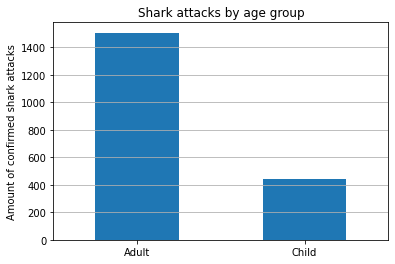

In [ ]:
#copying dataframe 
df1_q2 = df_q2.copy()

"""
First we need to define 'children. 
According to Unicef a child is under 18 years old 
(source: https://www.unicef.org/child-rights-convention/convention-text-childrens-version).
We then create a new column 'Age group' which consist of boolean value 'True' if it is a child.
"""
#Make boolean valyue where Age < 18 years (children) and >18 (adults).
#Then add a new column 'Age_group' with variabels children and adults
df1_q2['Age_group'] = df1_q2.loc[:, 'Age'] < 18


"""
Then we replace the boolean values in the column 'Age group' with child and adult. 
By plotting the results it shows that children aren't more likely to be attacked by sharks. 
491 childrens were attacked by sharks, whereas 1641 were adult
"""

#replace boolean values with 'Child' when < 18 yrs and 'Adult' when > 18 yrs
df1_q2['Age_group'] = df1_q2['Age_group'].replace({False: 'Adult', True:'Child'})

#plotting a barchart
df1_q2['Age_group'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Amount of confirmed shark attacks')
plt.title('Shark attacks by age group')
plt.grid(True, axis='y')
plt.show()


In [ ]:
#shows the numbers of victims by age group
victims_per_age_group = df1_q2['Age_group'].value_counts()
victims_per_age_group

Adult    1505
Child     444
Name: Age_group, dtype: int64

**QUESTION 3**

Are shark attacks where sharks were provoked more or less dangerous?

First we need to determine confirmed shark attacks by witnesses. We start the data with 1949 entries. 

Then we filter 'Provoked' in column 'Type'. The data consist of 211 confirmed shark attacks that were provoked.

Lastly we plot our data into a barchart where we count the amount of fatal casualties. 

The result shows that shark attacks that were provoked are not dangerous. 





In [ ]:
#select dataset df_q2
#this dataset provides us confirmed shark attacks.
#1949 entries
df_q3 = df_q2.copy()
df_q3



,Type,Activity,Age,Fatal,Species
0,Boating,Paddling,57.0,False,white shark
6,Unprovoked,Swimming,18.0,True,tiger shark
7,Unprovoked,Fishing,52.0,False,"lemon shark, 3'"
8,Unprovoked,Walking,15.0,False,bull shark
10,Provoked,Feeding sharks,32.0,False,grey reef shark
...,...,...,...,...,...
6238,Unprovoked,Spearfishing,27.0,False,1.8 m [6'] shark
6239,Unprovoked,Skindiving,36.0,False,"""a pack of sharks"""
6242,Unprovoked,Swimming naked near a date palm where many dat...,6.0,False,bull shark
6243,Unprovoked,Swimming in section of river used for washing ...,16.0,False,bull shark


In [ ]:
#Select column 'Type' on provoked
#Results shows confirmed shark attacks that were caused by provoking
#211 incidents were shark attacks that were provoked
is_provoked = df_q3.loc[df_q3.Type == 'Provoked']
is_provoked


,Type,Activity,Age,Fatal,Species
10,Provoked,Feeding sharks,32.0,False,grey reef shark
14,Provoked,Feeding sharks,34.0,False,"tawny nurse shark, 2m"
55,Provoked,Fishing / Wading,24.0,False,juvenile nurse shark
104,Provoked,Fishing,34.0,False,4' shark
122,Provoked,Fishing,32.0,False,tiger shark
...,...,...,...,...,...
4987,Provoked,Fishing,32.0,False,"250-lb ""dog shark"""
5074,Provoked,Standing in knee-deep water,19.0,False,"grey nurse shark, 4'"
5133,Provoked,Fishing,70.0,False,mako shark
5684,Provoked,Fishing,21.0,False,12' shark


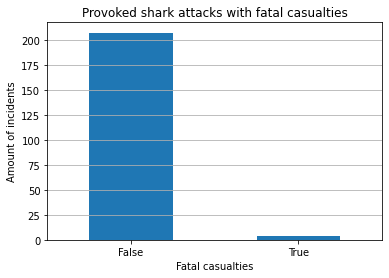

In [ ]:
#Plot bar chart with filtered data on 'Provoked' in column 'Type.
#We count the total of fatal casualties in column 'Fatal'
#barchart shows that shark attacks that were provoked are not dangerous
is_provoked['Fatal'].value_counts().plot(kind='bar')
plt.grid(axis='y')
plt.title('Provoked shark attacks with fatal casualties')
plt.xticks(rotation=0)
plt.xlabel('Fatal casualties')
plt.ylabel('Amount of incidents')
plt.show()



In [ ]:
#Amount of shark attacks that were provoked with fatal casualties:
#no fatal casualties: 207
#fatal casualties: 4
is_provoked['Fatal'].value_counts()

False    207
True       4
Name: Fatal, dtype: int64

**QUESTION 4**

Are certain activities more likely to result in a shark attack?

First we need to determine confirmed shark attacks by witnesses. 
The data consists of 1949 entries. 

In column 'Activities' we plot the top 10 activities that are likely to result in a shark attack.

The graph shows that surfing (482) will likely result in a shark attack, followed by swimming (255) and spearfishing (165) 


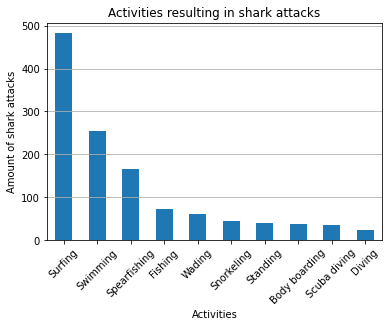

In [ ]:
#dataset starts with 1949 entries
#confirmed shark attacks
df_q4 = df_q2.copy()
top_10_activities = df_q4['Activity'].value_counts().head(10)

top_10_activities.plot(kind='bar')

plt.title('Activities resulting in shark attacks')
plt.xlabel('Activities')
plt.ylabel('Amount of shark attacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
#Count shark attacks by activities
top_10_activities


Surfing          482
Swimming         255
Spearfishing     165
Fishing           74
Wading            62
Snorkeling        45
Standing          40
Body boarding     38
Scuba diving      35
Diving            23
Name: Activity, dtype: int64